# Neural Network & Fuzzy Systems Project
# Image Classification & Model Comparison Using Different Deep Learning Techniques
## Name: Md. Saiful Bari Siddiqui
## Student ID : Not Yet Given

### Importing Necessary Packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Loading Mnist Dataset

In [3]:
# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


## Data Preprocessing

In [4]:
# Reshaping data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
num_classes = 10

# Normalizing data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## DL Model Designing

## CNN with 2 Convolutional & Maxpooling Layers

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28X28 with 1 byte color
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each digits
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               102656    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

## Model Compilation

In [86]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [87]:
hist = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 265us/sample - loss: 0.2659 - acc: 0.9216 - val_loss: 0.0825 - val_acc: 0.9741
Epoch 2/12
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0730 - acc: 0.9775 - val_loss: 0.0523 - val_acc: 0.9821
Epoch 3/12
60000/60000 [==============================] - 15s 250us/sample - loss: 0.0503 - acc: 0.9844 - val_loss: 0.0470 - val_acc: 0.9851
Epoch 4/12
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0387 - acc: 0.9884 - val_loss: 0.0404 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0310 - acc: 0.9903 - val_loss: 0.0355 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0255 - acc: 0.9916 - val_loss: 0.0331 - val_acc: 0.9886
Epoch 7/12
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0218 - acc: 0.9931 

## Model Evaluation

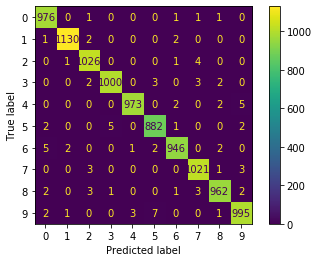

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict_classes(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, f1_score, matthews_corrcoef, log_loss, accuracy_score

y_pred_proba = model.predict_proba(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9999392751715328
Cohen_Kappa Score: 0.9901072550290408
F1 Score: 0.9909904452371601
Matthews Correlation Coefficient: 0.9901082455243879
Log Loss: 0.03250019743594558
Accuracy: 0.9911


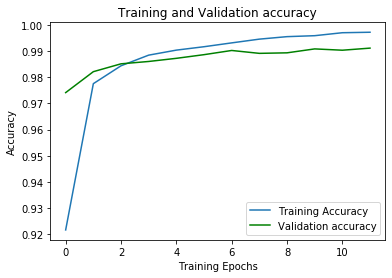

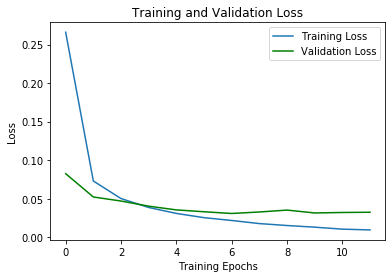

In [90]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'acc' ]
val_acc  = hist.history[ 'val_acc' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('Accuracy DIP.pdf')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

plt.savefig('Loss DIP.pdf')

## Visualization of Layer Outputs

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


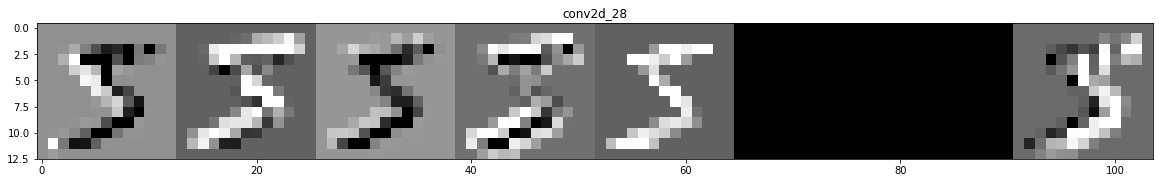

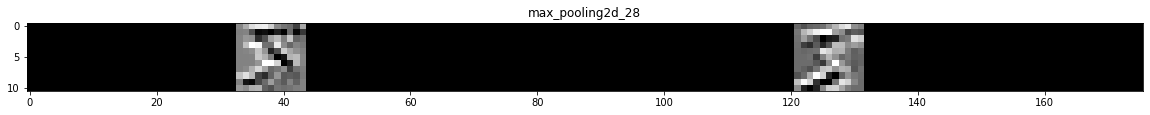

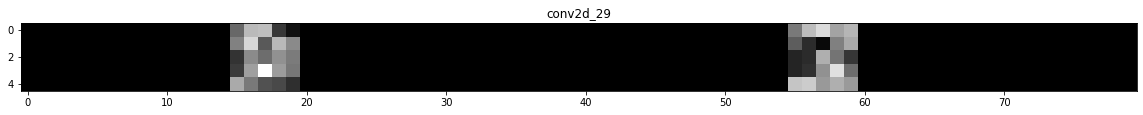

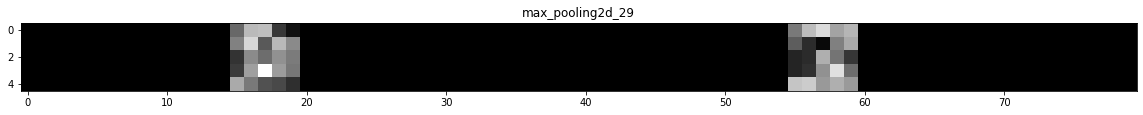

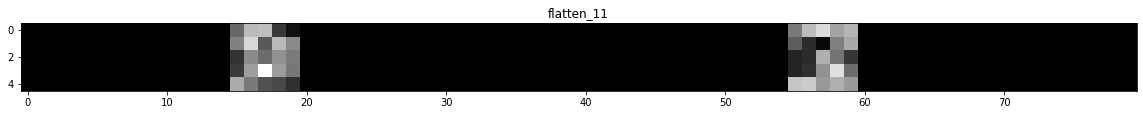

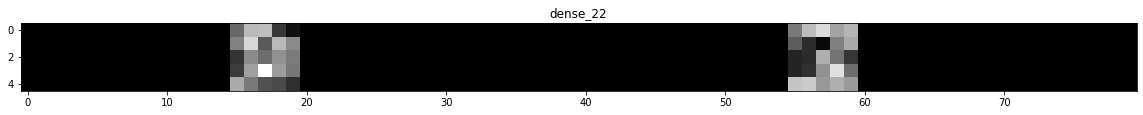

In [96]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[0,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 

## Feed Forward DNN Model with 2 Hidden Layers

In [147]:
batch_size = 128
num_classes = 10
epochs = 10

model = tf.keras.models.Sequential([
    # Flatten the inputs to feed into a DNN
    tf.keras.layers.Flatten(input_shape=input_shape), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'), 
    # 10 output neuron. It will contain a value from 0-9 for each digits
    tf.keras.layers.Dense(num_classes, activation='softmax')  
])


In [148]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


## Model Compilation

In [149]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Model Training

In [150]:
hist = model.fit(x_train, y_train, epochs = epochs, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 364us/sample - loss: 0.1920 - acc: 0.9420 - val_loss: 0.0860 - val_acc: 0.9741
Epoch 2/10
60000/60000 [==============================] - 23s 385us/sample - loss: 0.0932 - acc: 0.9741 - val_loss: 0.0957 - val_acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0753 - acc: 0.9807 - val_loss: 0.1000 - val_acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0650 - acc: 0.9846 - val_loss: 0.1207 - val_acc: 0.9772
Epoch 5/10
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0569 - acc: 0.9868 - val_loss: 0.1232 - val_acc: 0.9774
Epoch 6/10
60000/60000 [==============================] - 20s 328us/sample - loss: 0.0502 - acc: 0.9884 - val_loss: 0.1472 - val_acc: 0.9783
Epoch 7/10
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0461 - acc: 0.9901 

## Model Evaluation

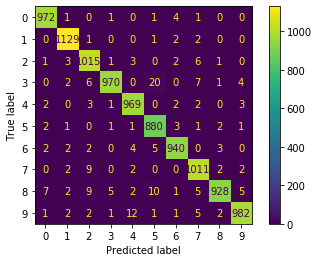

In [151]:
y_pred = model.predict_classes(x_test)
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Disp = ConfusionMatrixDisplay(Confusion_Matrix)
Disp.plot()
plt.show()

In [152]:
y_pred_proba = model.predict_proba(x_test)

ROC_AUC = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
Cohen_Kappa = cohen_kappa_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred, average='macro')
Matthews = matthews_corrcoef(y_test, y_pred)
Log = log_loss(y_test, y_pred_proba)
Accuracy = accuracy_score(y_test, y_pred)

print('ROC_AUC Score:', ROC_AUC)
print('Cohen_Kappa Score:', Cohen_Kappa)
print('F1 Score:', F1)
print('Matthews Correlation Coefficient:', Matthews)
print('Log Loss:', Log)
print('Accuracy:', Accuracy)

ROC_AUC Score: 0.9990831546569691
Cohen_Kappa Score: 0.9773246272499403
F1 Score: 0.9793811934536405
Matthews Correlation Coefficient: 0.9773440405144472
Log Loss: 0.19797253871642853
Accuracy: 0.9796


Text(0, 0.5, 'Loss')

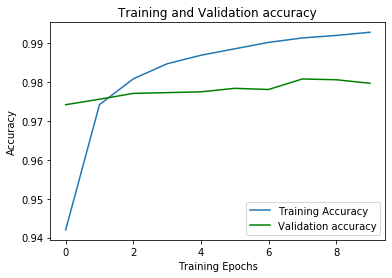

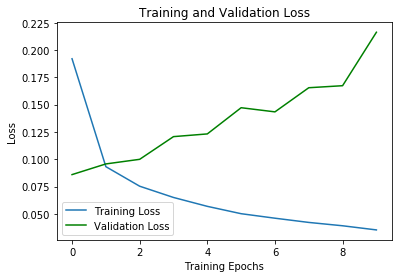

In [153]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = hist.history[     'acc' ]
val_acc  = hist.history[ 'val_acc' ]
loss     = hist.history[    'loss' ]
val_loss = hist.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc, color = 'g')
plt.title ('Training and Validation accuracy')
plt.legend(['Training Accuracy','Validation accuracy'])
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss, color = 'g' )
plt.title ('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Training Epochs')
plt.ylabel('Loss')

## Visualization of layers

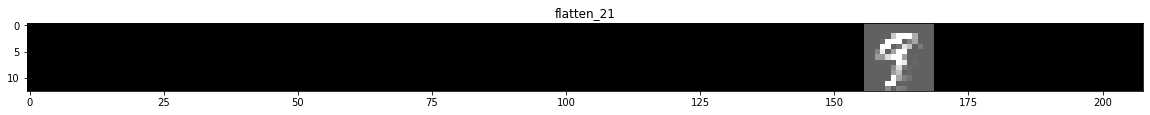

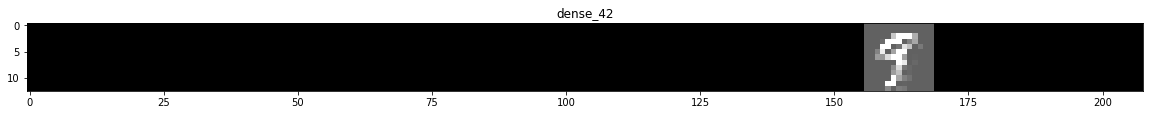

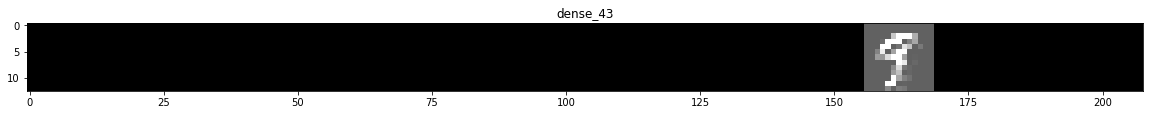

In [155]:
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = x_train[45,:,:,:]

x   = img_to_array(img)                           # Numpy array with shape (28, 28)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 28, 28)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gray' ) 